# Lecture 1: Applied deep learning

## Introduction

"Deep learning" is a specific flavor of machine learning that uses neural networks to approximate arbitrary functions to classify or regress data, or to serve as a controller. 

<center><img src="figs/ann_applications.png" width=50%></center>

While artificial neural networks have long time been one out of many go-to methods to address these problems, recent advances in computing, in particular graphical processing units (GPU) and the availability of large datasets, has led to the ability to train very, very large neural networks that have led to revolutionary results in many fields including computer vision, natural language processing, as well as video and speech processing.

Not too long ago, neural networks have been considered "deep" with more than 2 layers. Today, "deep" refers to neural networks with hundreds of layers or more. This is still shy of the human brain, or even tiny areas thereof, which contains 100 billion neurons, each with thousands of synapses connecting a single neuron to thousands of others. 

### Goal of this class

The goal of this class is provide a headstart into machine learning with deep neural networks starting from the available open-source tools. As starting point serves the keras library, a Python interface to popular deep neural network tools Theano and Tensorflow, and examples from the book "Deep Learning with Keras".  

The drawback of this approach is that the students will not be exposed to the theoretical foundations of deep learning to the extent that could be expected from a university graduate level course. Exploration of examples is therefore accompanied by reading the relevant literature and presenting them to class via Jupyter notebooks (this format).

The practice of model development and training is learned by two mini-projects that involve applying deep learning tools to data from the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine learning repository</a> as well as a final project involving data from a current research project. 

### Grading

The final grade will be computed using the following key:

- 10% In-class participation
- 15% Homework 1: Implementing a simple classification/regression problem
- 15% Homework 2: Classification/regression on time series data
- 20% Jupyter notebook summary of a selected paper
- 40% Final project
- Extra credit: narrated YouTube video

All deliverables will need to be pushed as IPhython notebooks to a <a href="https://github.com/correll/deep-learning">public github repository</a>. This repository is automatically rendered as a public Jupyter lab server, allowing everyone to run and temporarily modify (but not save) your work.

As all deliverables are public, there is a strict late policy. Late submissions will be deducted one letter grade. 

### What you need

- You will need Python 3 and a series of libraries that is listed <a href="https://github.com/correll/deep-learning/blob/master/requirements.txt">here</a>
- You will need a copy of <a href="https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html">Jupyter Lab</a>
on your personal machine
- You will need a version of <a href="https://git-scm.com/book/en/v2/Getting-Started-Installing-Git">git</a> to commit your notebook files to the class' repository


## Artificial Neural Networks

Artificial neural networks are inspired by neurons and synapses in the human brain and have been studied since the 1950ies. One of the earliest model is the <a href="https://en.wikipedia.org/wiki/Perceptron">Perceptron</a>, which can classify an input vector $x$ of dimension $m$ to lie above or below a hyperplane defined by the weights $w$. Formally,

\begin{equation}
f(x)=\begin{cases}
1 \qquad wx+b > 0\\
0 \qquad otherwise
\end{cases}
\end{equation}

Here, $wx=\sum_{i=1}^mw_ix_i$ is the <a href="https://en.wikipedia.org/wiki/Dot_product">dot product</a>. To better understand this, we will train a simple Perceptron on a very simple artificial dataset with $m=2$ so that it can be shown in a scatter plot. Note that $wx+b$ simplifies to $wx$ when preceeding $x$ with a '1', i.e. $x\leftarrow [1 \quad x]$. Then $w_0=b$, simplifying coding.

The error is  0.0
The weight vector is  [-0.07  0.05 -0.04]


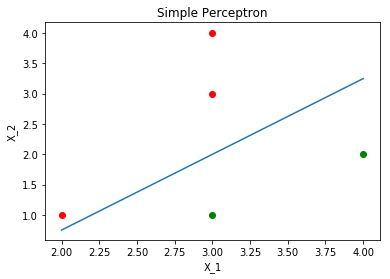

In [288]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

# Synthetic data with data pairs x1,x2 in x and associated classes in d
x=np.array([[2,1],[3,4],[3,3],[4,2],[3,1]])
d=np.array([0,0,0,1,1])

# Adding a column of '1' in front of x so that w_0 is the offset
x=np.append(np.ones((len(x),1)),x,1)

# Initializing the weights with zeros
w=np.zeros(x.shape[1])

# Initializing the perceptron predictions to zero
y=np.zeros(len(x))

# Perceptron learning parameters
r=0.01 # learning rate
iterations=100 # number of iterations

for i in range(iterations):
    for j in range(len(x)): # do this for every entry of x
        y[j]=np.heaviside(np.dot(w,x[j,:]),1) # calculate the dot product and implement the 
                                              # cut-off using the Heaviside function
        w=w+r*(d[j]-y[j])*x[j,:] # use learning rate to update weights
        
error=0;
for j in range(len(x)):
    error+=abs(d[j]-y[j])
error=error/len(x)

print('The error is ', error)
print('The weight vector is ', w)

colors=('red','green')
for i in range(2):
    px = x[:, 1][d == i]
    py = x[:, 2][d == i]
    plt.scatter(px, py, c=colors[i])

plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("Simple Perceptron")

lx=np.linspace(min(x[:,1]),max(x[:,1]),100)
plt.plot(lx,-w[a+1]/w[b+1]*lx-w[0]/w[b+1])
#plt.show()

Notice that the abo

This example has also introduced two powerful Python libraries: numpy and matplotlib. To learn more, check out the following tutorials:

- <a href="https://likegeeks.com/numpy-array-tutorial/">NumPy array tutorial</a>
- <a href="https://matplotlib.org/3.1.1/tutorials/index.html">Matplotlib tutorial</a>

### Geometric intepretation of the simple Perceptron
What is the geometric interpretation of the weight vector? It is a separating hyperplane, that is a 1D line when $m=2$. This can be seen as follows: writing the dot product out yields

\begin{equation}
w_1x_1+w_2x_2+b=0
\end{equation}

As we plot $x_1$ along the x-axis and $x_2$ along the y-axis, we can write

\begin{equation}
w_1x+w_2y+b=0
\end{equation}

This can be rewritten into
\begin{equation}
y=-\frac{w1}{w2}x-\frac{b}{w_2}
\end{equation}


## Multi-layer Perceptron

We can now combine multiple Perceptrons to create curved planes in order to classify data that cannot be 

# Literature

<a href="https://psycnet.apa.org/record/1959-09865-001">Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.</a>

